_Lambda School Data Science_

# Reshape data

Objectives
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- pandas documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Upgrade Seaborn

Run the cell below which upgrades Seaborn and automatically restarts your Google Colab Runtime.

In [0]:
!pip install seaborn --upgrade
import os
os.kill(os.getpid(), 9)

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline 
#Special magic commands for a notebook enviorment 
#|  % <- Renders visualizations inline 
#| ! <- Means execute in terminal
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])  # list of list visualized below | These are rows

table2 = table1.T # Transposed list

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [3]:
table1 # Contents of the DF rendered inline like an HTML Table

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [4]:
table2 # Shows the same Table as 1 but in a Transposed state

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [7]:
# Sometimes it helps to T rows when looking at a DF Head 
table1.head().T
table1.describe().T

,count,mean,std,min,25%,50%,75%,max
treatmenta,2.0,9.500000,9.192388,3.0,6.25,9.5,12.75,16.0
treatmentb,3.0,4.666667,5.507571,1.0,1.50,2.0,6.50,11.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [8]:
# Melting and Pivoting work with columns 
# to check cols / index
#table1.columns.tolist()
#table1.index.tolist()

# In order to work with this, you will want to reset the index
# By using id_vars, now the data is in the format we want to create tidy data
# You may want to rename the columns later
tidy = table1.reset_index().melt(id_vars='index')

# Renaming the columns
tidy = tidy.rename(columns={
    'index': 'name',
    'variable': 'trt',
    'value': 'result'
})

# Replace treatment, since this is a string, add str
tidy['trt'] = tidy['trt'].str.replace('treatment', '')

# In Pandas, it's hard to hide the index, because you have to have it
# In theory, set_index is a way to hide that initial index
tidy.set_index('name')
tidy


,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


## Extra Encoding Challenge 

In [9]:
# Multiple Solutions
tidy['trt'].replace('a', 0).replace('b', 1) # This was on our test last week
tidy['trt'].map({'a': 0}) # With this method, when you dont specify B, it becomes nan
tidy['trt'] == 'b'# Does it equal B? Good way to check | Also, creating boolean values is very useful
(tidy['trt'] == 'a').astype(int) # If you want these represented as integers
# You can change the astype to float also, should not work if there is a NaN

tidy['trt'].apply(lambda x: ord(x) - ord('a')) # Pull this apart to figure this out when it is missing a value represented by X

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

## Table 2 --> Tidy

In [58]:
# Transpose, Reset Index, and Melt

tidy2 = table2.T.reset_index().melt(id_vars='index')

# Renaming the columns
tidy2 = tidy2.rename(columns={
        'index': 'names',
        'variable': 'trt',
        'value': 'result'
})

# Remove the treatment from the trt column
tidy2['trt'] = tidy2['trt'].str.replace('treatment', '')

# Show Work
tidy2

,names,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [39]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [63]:
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


**Note: Pivot and Melt are Inverse Operations of each other**

In [33]:
# Interesting Hint:
# Searching off of pandas.pivot_table is different that pandas.dataframe.pivot_table
tidy.pivot_table(index='name', columns='trt', values='result') # Now it is Pivoted back the way it was before. Inverse Pivot 

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Tidy --> Table 2

In [60]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [68]:
# Part of Assignment | Make it look like the original example

tidy2.pivot_table(index='trt', columns='names', values='result')

names,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


## Seaborn Example

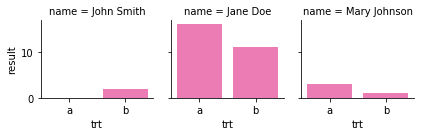

In [96]:
# categorical plot
sns.catplot(x='trt', y='result', col='name',
           kind='bar', data=tidy, height=2, color='hotpink');

# Omg YES. Love this plot

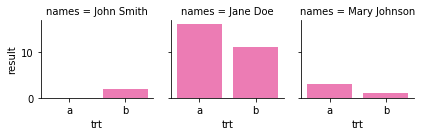

In [98]:
# Categorical Plot for Tidy 2
sns.catplot(x='trt', y='result', col='names',
           kind='bar', data=tidy2, height=2, color='hotpink');

## Load Instacart data

Let's return to the dataset of [3 Million Instacart Orders](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)

If necessary, uncomment and run the cells below to re-download and extract the data

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

Run these cells to load the data

In [3]:
%cd instacart_2017_05_01 

/content/instacart_2017_05_01


In [0]:

products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), # Another interesting way to read in multiple pandas functions
                            pd.read_csv('order_products__train.csv')]) # "composing functions"

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [7]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [9]:
# See list of products in the DF
products.columns.tolist()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [10]:
# Does have OHOD
orders.columns.tolist()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [11]:
# Previous DF Did not have anything in common, so you need "glue"
# This particular DF is not useless, it will be the glue that holds together the prior DS
# Because it contains both order_id and product_id
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [0]:
# What I want from each column list

merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))
          
          
          
#order_products[['order_id', 'product_id']]
#orders[['order_id', 'order_hour_of_day']]

In [13]:
# Shape
merged.shape, products.shape, order_products.shape, orders.shape

((33819106, 4), (49688, 4), (33819106, 4), (3421083, 7))

In [14]:
# Looking at one indiv order and what time of day
merged.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [0]:
# What condion will filter merged DF to just the 2 products that we care about?
# OMFG this is exactly what I was attempting yesterday


condition = ((merged['product_name'] == 'Half Baked Frozen Yogurt') | 
            (merged['product_name'] == 'Half And Half Ultra Pasteurized'))

# to this....
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

condition = merged['product_name'].isin(product_names)
subset = merged[condition]

In [16]:
merged.shape, subset.shape

((33819106, 4), (5978, 4))

In [17]:
# View just a random sample of the DF
subset.sample(n=5)

,product_id,product_name,order_id,order_hour_of_day
22248238,30668,Half Baked Frozen Yogurt,2894997,20
14362877,30668,Half Baked Frozen Yogurt,26199,7
4836414,30668,Half Baked Frozen Yogurt,3210730,20
21832831,30668,Half Baked Frozen Yogurt,1672614,13
29198064,9292,Half And Half Ultra Pasteurized,2171312,14


## 4 ways to reshape and plot

### 1. value_counts

In [0]:
froyo = subset[subset['product_name'] == 'Half Baked Frozen Yogurt']
cream = subset[subset['product_name'] == 'Half And Half Ultra Pasteurized']

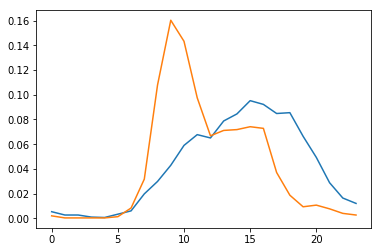

In [19]:
# Raw Counts
#froyo['order_hour_of_day'].value_counts().sort_index()

# Normalized Counts and Plot
froyo['order_hour_of_day'].value_counts(normalize=True).sort_index().plot();


# Now Both
(cream['order_hour_of_day'].value_counts(normalize=True).sort_index().plot());

### 2. crosstab

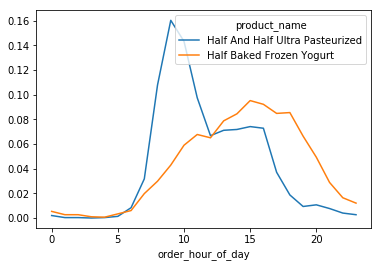

In [20]:
# like another pivot table
# if you dont normalize it is raw counts
# you can add .plot()
pd.crosstab(subset['order_hour_of_day'],
            subset['product_name'],
            normalize='columns').plot();

### 3. pivot_table

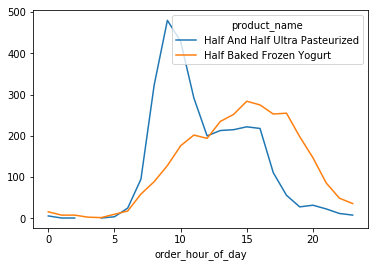

In [21]:
# crosstab is a type of PT
# taking an av value
subset.pivot_table(index='order_hour_of_day',
                   columns='product_name',
                   values='order_id',
                   aggfunc=len).plot();

### 4. melt

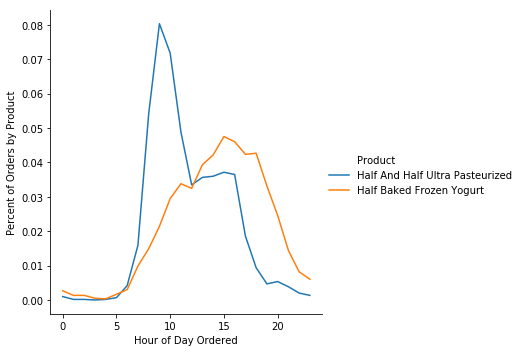

In [22]:
table = pd.crosstab(subset['order_hour_of_day'],
                    subset['product_name'],
                    normalize=True)
melted = (table.reset_index().melt(id_vars='order_hour_of_day').rename(columns={'order_hour_of_day': 'Hour of Day Ordered', 'product_name': 'Product', 'value': "Percent of Orders by Product"}))

sns.relplot(x='Hour of Day Ordered',
            y= 'Percent of Orders by Product',
            hue='Product',
            data=melted,
            kind='line');

# ASSIGNMENT
- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
  - Table 2 --> Tidy
  - Tidy --> Table 2

- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sns.load_dataset('flights')

In [24]:
# Viewing the columns available
flights.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [25]:
# Pivot Table
flights.pivot_table(index='year', columns='month', values='passengers')

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


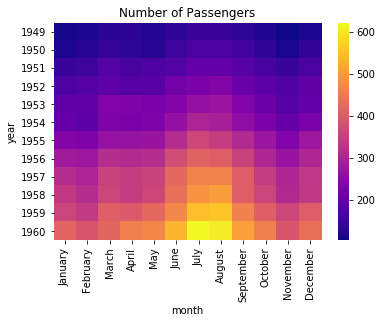

In [28]:
flights = sns.load_dataset("flights")
flights = flights.pivot("year", "month", "passengers")
ax = sns.heatmap(flights, cmap='plasma')
plt.title('Number of Passengers')
plt.show();                

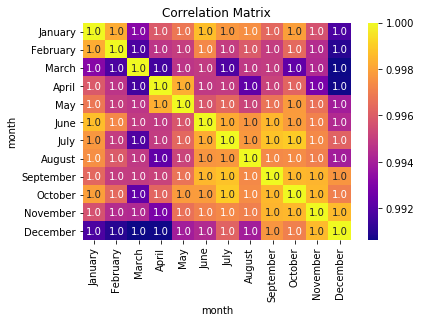

In [27]:
# Just Experimenting With Plots
import matplotlib.pyplot as plt
sns.heatmap(flights.corr(), annot=True, fmt=".1f", cmap='plasma')
plt.title('Correlation Matrix')
plt.show();

# STRETCH OPTIONS

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [29]:
merged.columns

Index(['product_id', 'product_name', 'order_id', 'order_hour_of_day'], dtype='object')

In [30]:
orders.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [31]:
products.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [32]:
order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [0]:
# Pulled in & Gluing Together
order_products = pd.concat([
    pd.read_csv('order_products__prior.csv').sample(frac=0.50), 
    pd.read_csv('order_products__train.csv').sample(frac=0.50)
])

In [34]:
# Combining DFs

merging = pd.merge(order_products,products)
# Order Column
orders_new = orders[['order_id','order_hour_of_day']].copy()

data_new = merging[['order_id','product_name']].copy()

# Check it out
data_new.head()

,order_id,product_name
0,2795659,Wheat Sandwich Thins
1,1394566,Wheat Sandwich Thins
2,712231,Wheat Sandwich Thins
3,2037494,Wheat Sandwich Thins
4,1305842,Wheat Sandwich Thins


In [0]:
# The Big and Hopefully final merge
df = pd.merge(data_new,orders_new)

In [36]:
# Checking to see that I have what I need for columns
df.columns

Index(['order_id', 'product_name', 'order_hour_of_day'], dtype='object')

In [37]:
# Counting the most Popular Products
total_sales = df['product_name'].value_counts()
# Counting total sales greater than 2900
total_sales = total_sales[total_sales >2900]
# Checking the code
total_sales
# Just the index
total_sales.index

Index(['Banana', 'Bag of Organic Bananas', 'Organic Strawberries',
       'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado',
       'Large Lemon', 'Strawberries', 'Limes', 'Organic Raspberries',
       ...
       'Organic Super Fruit Punch Juice Drink',
       'Sweet Potato Fries with Sea Salt', 'Baby Spinach Salad',
       'Cold-Brew Black Coffee', 'Iced Oatmeal Cookie Kid Z Bar',
       'Caramel Cookie Crunch Gelato', 'Ataulfo Mango',
       'French Vanilla Coconut Milk Creamer',
       'Vitamin Water Zero Squeezed Lemonade', 'Original Puffins Cereal'],
      dtype='object', length=971)

In [38]:
# Filtering exactly what I want to see
condition_1 = df['product_name'].isin(list(total_sales.index))

df2 = df[condition_1]
df2.head()

,order_id,product_name,order_hour_of_day
1,2795659,Organic Fat Free Milk,8
2,2795659,Seedless Red Grapes,8
3,2795659,Organic Bread with 21 Whole Grains,8
4,2795659,Oven Roasted Turkey,8
5,2795659,Organic Strawberry Fruit Spread,8


In [0]:
group_mean = df2.groupby(['product_name']).mean().copy()

In [40]:
# Sorting our list by Late Night
late_night_orders = group_mean.sort_values(by=['order_hour_of_day'], ascending=False).index[:25]
late_night_orders


Index(['Half Baked® Ice Cream', 'Americone Dream® Ice Cream', 'Mint Chip',
       'Mediterranean Mint Gelato', 'Strawberry Ice Cream',
       'Chocolate Chip Cookie Dough Ice Cream', 'Caramel Cookie Crunch Gelato',
       'Organic Dark Chocolate Peanut Butter Cups', 'Sea Salt Caramel Gelato',
       'Chocolate Ice Cream', 'Cabernet Sauvignon',
       'Organic Vanilla Bean Ice Cream', 'Almond Milk Strawberry Yogurt',
       'Diet Ginger Ale All Natural Soda', 'Organic Medjool Dates',
       'Macaroni & Cheese Dinner Original Flavor', 'Sauvignon Blanc',
       'Chardonnay', 'Organic Whole Crimini Mushrooms', 'Vanilla Ice Cream',
       'Margherita Pizza', 'Seven Grain Crispy Tenders', 'Club Soda',
       'Low Fat Plain Yogurt', 'Whole Strawberries'],
      dtype='object', name='product_name')

In [41]:
# Sorting our list by Early Morning
early_morn_orders = group_mean.sort_values(by=['order_hour_of_day'], ascending=False).index[-25:]
early_morn_orders

Index(['Organic Half & Half', 'Honeycrisp Apples',
       'Total 0% Blueberry Acai Greek Yogurt',
       'Oats & Honey Gluten Free Granola',
       'Gluten Free Peanut Butter Dark Chocolate Chewy With a Crunch Granola Bars',
       'Reduced Fat 2% Milk', 'Mixed Fruit Fruit Snacks',
       'Mozzarella String Cheese', 'Organic Low Fat Milk', 'Mineral Water',
       'Organic Simply Naked Pita Chips', 'French Vanilla Creamer',
       'Whole Grain Cheddar Baked Snack Crackers', 'Soda', 'Clementines',
       'Cherrios Honey Nut', '0% Greek Strained Yogurt', 'Half And Half Cream',
       'Original Beef Jerky', 'Extra Fancy Unsalted Mixed Nuts', 'Popcorn',
       'Crunchy Oats 'n Honey Granola Bars', 'Apples', 'Zero Calorie Cola',
       'Trail Mix'],
      dtype='object', name='product_name')

In [49]:
# Late Night DataFrame
late_night_df = df[df['product_name'].isin(late_night_orders)].copy()
late_night_df = late_night_df[['product_name','order_hour_of_day']]
late_night_df.head()


,product_name,order_hour_of_day
93,Almond Milk Strawberry Yogurt,16
299,Organic Dark Chocolate Peanut Butter Cups,8
430,Half Baked® Ice Cream,19
600,Organic Whole Crimini Mushrooms,11
710,Low Fat Plain Yogurt,19


In [48]:
# Early Morning DataFrame
early_morn_df = df[df['product_name'].isin(early_morn_orders)].copy()
early_morn_df = early_morn_df[['product_name','order_hour_of_day']]
early_morn_df.head()

,product_name,order_hour_of_day
1272,Organic Half & Half,16
1668,Oats & Honey Gluten Free Granola,10
1898,Oats & Honey Gluten Free Granola,12
2283,Organic Half & Half,7
2501,Organic Half & Half,9


In [0]:
early_morn_df['one']=1
late_night_df['one']=1


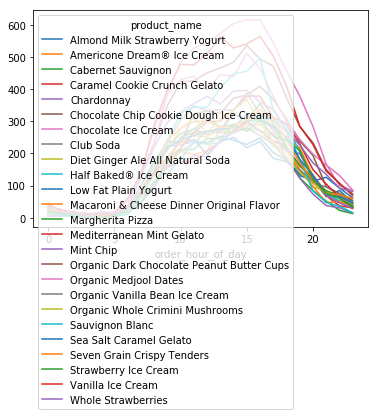

In [77]:
# Should I crosstab?

late_night_df.pivot_table(index='order_hour_of_day', 
                          columns='product_name',
                          values='one',
                          aggfunc=np.sum).plot();

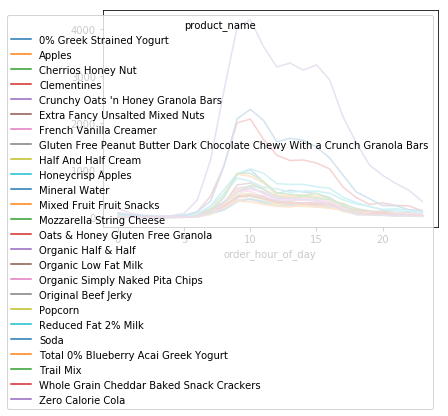

In [76]:
# How do I make the legend smaller?
early_morn_df.pivot_table(index='order_hour_of_day', 
                          columns='product_name', 
                          values='one',
                          aggfunc=np.sum).plot();

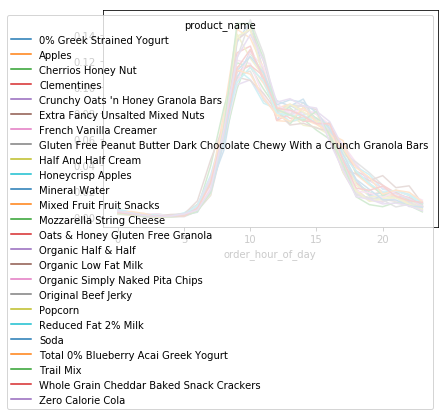

In [78]:
# Why are these so close in distribution?
pd.crosstab(early_morn_df['order_hour_of_day'],
            early_morn_df['product_name'],
            normalize='columns').plot();

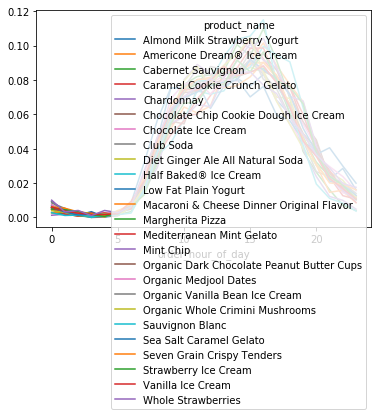

In [79]:
# Another close distribution
pd.crosstab(late_night_df['order_hour_of_day'],
            late_night_df['product_name'],
            normalize='columns').plot();

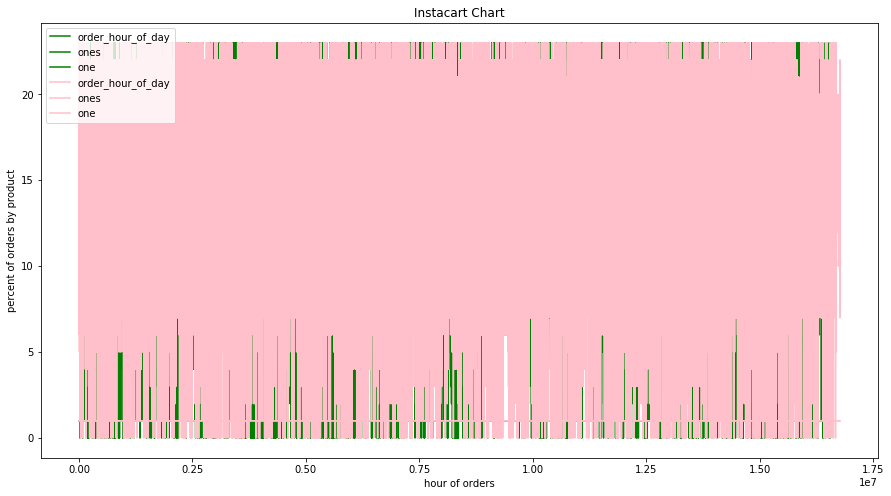

In [82]:
fig, ax = plt.subplots()

ep = early_morn_df.plot(ax = ax,color='green')
lp = late_night_df.plot(ax = ax,color='pink')


plt.ylabel('percent of orders by product')
plt.xlabel('hour of orders')
plt.title('Instacart Chart')

#lp_leg = lp.legend(latelist,loc="upper right",prop={'size': 7})
#ep_leg = ep.legend((list(earlylist))[::-1],loc="upper left",prop={'size': 7})


ax.figure.set_size_inches(15, 8)
#ax.add_artist(lp_leg)


plt.show()


In [0]:
fig = plt.figure(figsize=(8,6))

gh1 = fig.add_subplot(121)
early_morn_df.plot(kind='bar', ax=gh1)  # pass in subplot as an argument
gh1.set_xlabel('product_name')
gh1.set_ylabel('order_hour_of_day')
gh1.set_title('Applicants by credit history')

gh2 = fig.add_subplot(122)
late_night_df.plot(kind='bar', ax=gh2)  # pass in subplot as an argument
gh2.set_xlabel('order_hour_of_day')
gh2.set_ylabel('product_name')
gh2.set_title('Probability of getting loan by credit history')

plt.show()